In [2]:
import matplotlib.pyplot as plt
import numpy as np


from scipy.signal import find_peaks
from scipy.integrate import odeint

# Set random seed (for reproducibility)
np.random.seed(1000)

# Start and end time (in milliseconds)
tmin = 0.0
tmax = 1000.0

# Average potassium channel conductance per unit area (mS/cm^2)
gK = 36.0

# Average sodoum channel conductance per unit area (mS/cm^2)
gNa = 120.0

# Average leak channel conductance per unit area (mS/cm^2)
gL = 0.3

# Membrane capacitance per unit area (uF/cm^2)
Cm = 1.0

# Potassium potential (mV)
VK = -12.0

# Sodium potential (mV)
VNa = 115.0

# Leak potential (mV)
Vl = 10.613

# Time values
T = np.linspace(tmin, tmax, 10000)

# Potassium ion-channel rate functions

def alpha_n(Vm):
    return (0.01 * (10.0 - Vm)) / (np.exp(1.0 - (0.1 * Vm)) - 1.0)

def beta_n(Vm):
    return 0.125 * np.exp(-Vm / 80.0)

# Sodium ion-channel rate functions

def alpha_m(Vm):
    return (0.1 * (25.0 - Vm)) / (np.exp(2.5 - (0.1 * Vm)) - 1.0)

def beta_m(Vm):
    return 4.0 * np.exp(-Vm / 18.0)

def alpha_h(Vm):
    return 0.07 * np.exp(-Vm / 20.0)

def beta_h(Vm):
    return 1.0 / (np.exp(3.0 - (0.1 * Vm)) + 1.0)
  
# n, m, and h steady-state values

def n_inf(Vm=0.0):
    return alpha_n(Vm) / (alpha_n(Vm) + beta_n(Vm))

def m_inf(Vm=0.0):
    return alpha_m(Vm) / (alpha_m(Vm) + beta_m(Vm))

def h_inf(Vm=0.0):
    return alpha_h(Vm) / (alpha_h(Vm) + beta_h(Vm))
  


In [3]:
def id(n):
    return 5

In [4]:
# Compute derivatives
def compute_derivatives(y, T):
    dy = np.zeros((4,))
    
    Vm = y[0]
    n = y[1]
    m = y[2]
    h = y[3]
    
    # dVm/dt
    GK = (gK / Cm) * np.power(n, 4.0)
    GNa = (gNa / Cm) * np.power(m, 3.0) * h
    GL = gL / Cm
    
    dy[0] = (id(T) / Cm) - (GK * (Vm - VK)) - (GNa * (Vm - VNa)) - (GL * (Vm - Vl))
    
    # dn/dt
    dy[1] = (alpha_n(Vm) * (1.0 - n)) - (beta_n(Vm) * n)
    
    # dm/dt
    dy[2] = (alpha_m(Vm) * (1.0 - m)) - (beta_m(Vm) * m)
    
    # dh/dt
    dy[3] = (alpha_h(Vm) * (1.0 - h)) - (beta_h(Vm) * h)
    
    return dy
  
# State (Vm, n, m, h)
Y = np.array([0.0, n_inf(), m_inf(), h_inf()])


# Solve ODE system
# Vy = (Vm[t0:tmax], n[t0:tmax], m[t0:tmax], h[t0:tmax])


In [5]:
def Vy1(listv):
    Vm_list = []
    for i in Vy:
        Vm_list.append(i[0])

    return Vm_list

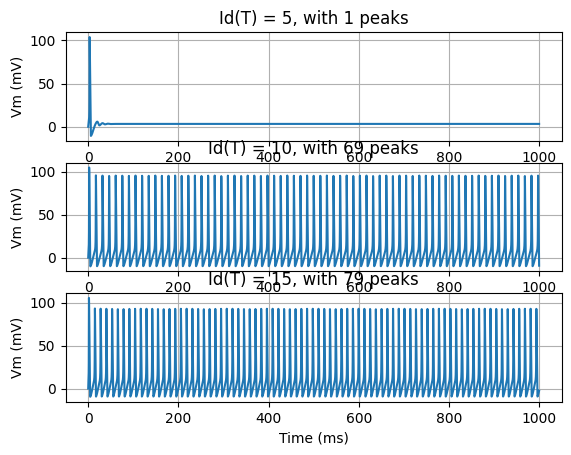

In [6]:
testlist = [5,10,15]

fig, axs = plt.subplots(3)
for i in range(0,len(testlist)):
    def id(n):
        return testlist[i]
    Vy = odeint(compute_derivatives, Y, T)
    spikes, _ = find_peaks(Vy1(Vy), prominence = 5)

    axs[i].plot(T,Vy[:,0])

    axs[i].set_xlabel('Time (ms)')
    axs[i].set_ylabel('Vm (mV)')
    axs[i].set_title(f'Id(T) = {testlist[i]}, with {len(spikes)} peaks')
    axs[i].grid(True)

In [7]:
I_input = np.linspace(0,200,201)


peaklist = []
for i in range(0,len(I_input)):
    def id(t):
        
        return I_input[i]
    Vy = odeint(compute_derivatives, Y, T)
    listV = Vy1(Vy)
    
    peaklist.append(len(find_peaks(listV, prominence = 5)[0]))

# x-axis, delta T
# y-axis frequency

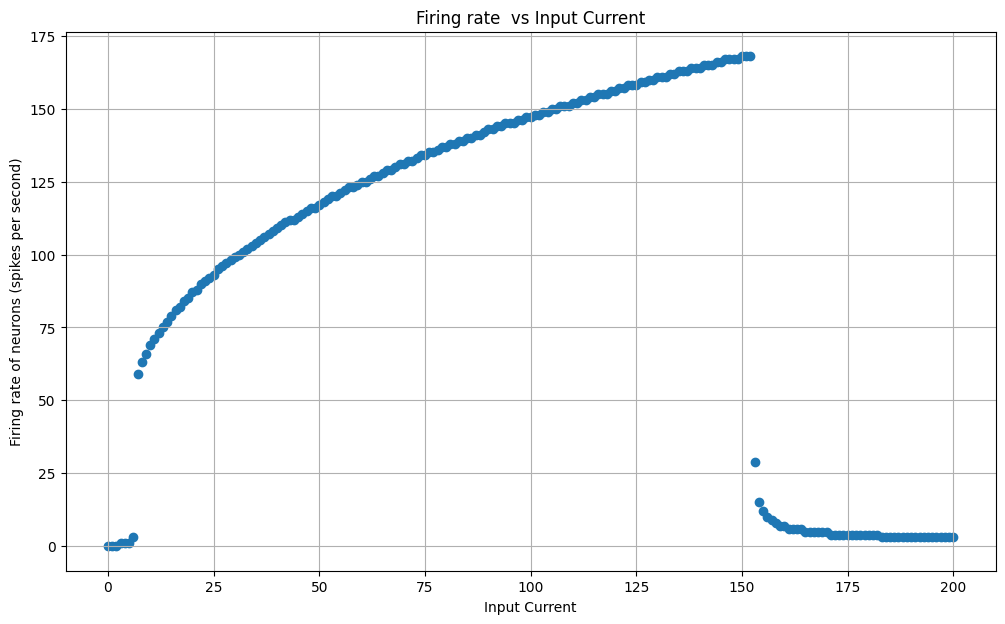

In [11]:
# Neuron potential
fig, ax = plt.subplots(figsize=(12, 7))
ax.scatter(I_input, peaklist)
ax.set_xlabel('Input Current')
ax.set_ylabel('Firing rate of neurons (spikes per second)')
ax.set_title('Firing rate  vs Input Current')
plt.grid()

plt.savefig('Firing rate vs Input current')

In [ ]:
peak_data = find_peaks(listV, prominence = 5)[0]

In [ ]:
for i in range(1,len(peak_data)):
    